In [1]:
from ipyleaflet import *
Map()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [2]:
m = Map(center=(52,10), zoom=8, basemap = basemaps.Esri.DeLorme)

In [3]:
m

Map(center=[52, 10], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [4]:
map = Map(center = (53.48, -2.24), basemap=basemaps.Esri.WorldImagery)

In [5]:
map

Map(center=[53.48, -2.24], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

def check_same_entries_in_Indicator(data):
    return data['Indicator'].nunique() == 1

def plot_first_tooltip_by_location(data, period, column_name = None):
    """
    Plot the value of "First Tooltip" for Dim1 = 'Total' at a designated period for different locations.

    """
    if column_name is None and check_same_entries_in_Indicator(data):
        column_name = data['Indicator'].iloc[0]
        
    # Filter data for the specified period and Dim1 = 'Total'
    filtered_data = data[(data['Period'] == period) & (data['Dim1'] == 'Total')]


    if 'Dim1' in data.columns and set(data['Dim1'].unique()) == {'Urban', 'Total', 'Rural'}:
        # Plotting
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Location', y='First Tooltip', data=filtered_data)
        plt.title(f'{column_name}for Dim1 = Total at Period {period}')
        plt.xlabel('Location')
        plt.ylabel(f'{column_name}')
        plt.legend(title='Indicator', bbox_to_anchor=(1, 1))
        plt.show()
    else:
        print("Dim1 column does not meet the specified criteria.")


In [8]:
file_path = "safelySanitization.csv"
health_data = load_data(file_path)
health_data.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Albania,Population using safely managed sanitation ser...,2017,Total,39.86
1,Albania,Population using safely managed sanitation ser...,2017,Urban,40.17
2,Albania,Population using safely managed sanitation ser...,2017,Rural,39.39
3,Albania,Population using safely managed sanitation ser...,2016,Total,39.85
4,Albania,Population using safely managed sanitation ser...,2016,Urban,40.17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


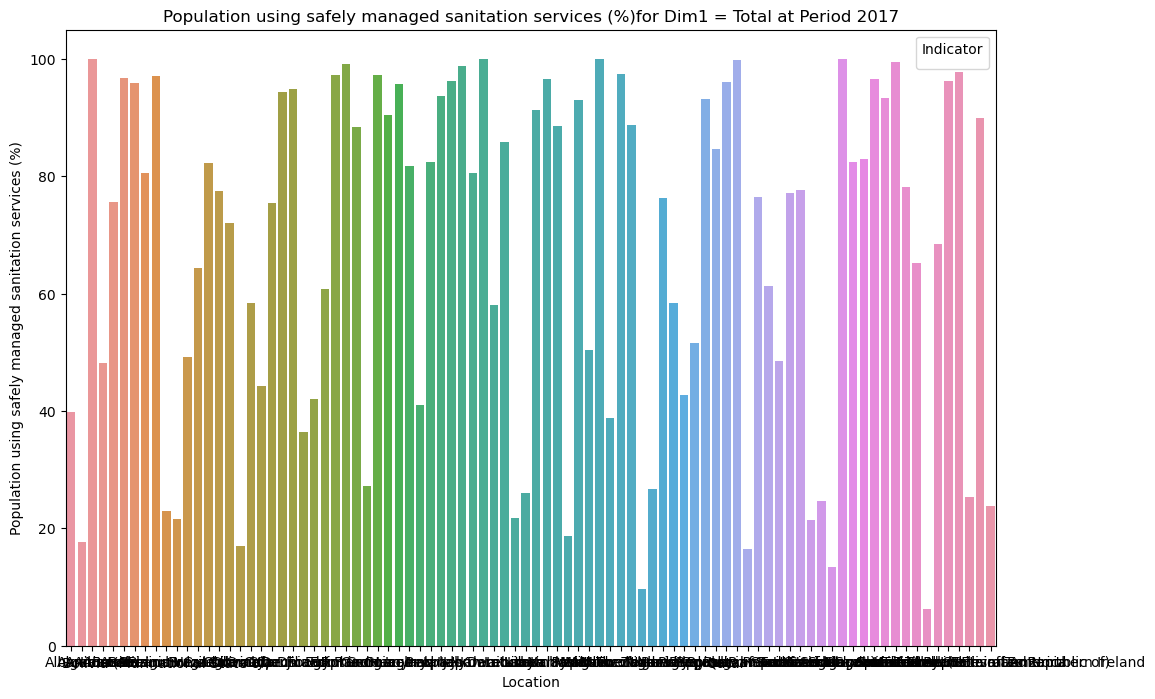

In [9]:
plot_first_tooltip_by_location(health_data, 2017)

In [10]:
health_data['Indicator']

0       Population using safely managed sanitation ser...
1       Population using safely managed sanitation ser...
2       Population using safely managed sanitation ser...
3       Population using safely managed sanitation ser...
4       Population using safely managed sanitation ser...
                              ...                        
3650    Population using safely managed sanitation ser...
3651    Population using safely managed sanitation ser...
3652    Population using safely managed sanitation ser...
3653    Population using safely managed sanitation ser...
3654    Population using safely managed sanitation ser...
Name: Indicator, Length: 3655, dtype: object

In [11]:
check_same_entries_in_Indicator(health_data)

True